# Project 4: Supervised and Unsupervised Learning
## Predicting with Twitter Public API

### Starting the project

Test...

In [7]:
import numpy as np
import pandas as pd
import requests
import json
import oauth2
import renders as rs

%matplotlib inline
import matplotlib.pyplot as plt

# Read consumer key from gitignored CSV
twitter_pass = pd.read_csv('pass.csv')
twitter_consumer_key = twitter_pass.loc[0][0]
twitter_consumer_secret = twitter_pass.loc[0][1]
access_token = twitter_pass.loc[0][2]
token_secret = twitter_pass.loc[0][3]

# Define oauth request
def oauth_req(url, http_method='GET', post_body='', http_headers=None):
    consumer = oauth2.Consumer(key=twitter_consumer_key, secret=twitter_consumer_secret)
    token = oauth2.Token(key=access_token, secret=token_secret)
    client = oauth2.Client(consumer, token)
    resp, content = client.request(url, method=http_method, body=post_body, headers=http_headers )
    return json.loads(content)

### Twitter API

Using Twitter API

In [2]:
# useful endpoints functions
def get_friends_list_by_name(screen_name):
    return oauth_req('https://api.twitter.com/1.1/friends/list.json?screen_name='+screen_name)

def get_friends_ids_by_name(screen_name):
    return oauth_req('https://api.twitter.com/1.1/friends/list.json?screen_name='+screen_name)

def get_user_info_by_name(screen_name):
    return oauth_req('https://api.twitter.com/1.1/users/show.json?screen_name='+screen_name)

def search_users_by_theme(theme, size=20):
    return oauth_req('https://api.twitter.com/1.1/users/search.json?q='+theme+'&count='+str(size))

In [3]:
# useful join functions
def user_friends_list_to_pandas(df, users_dict):
    '''
    This function populate empty dataframe with empty columns
    based on a friends list of the twitter
    '''
    current_columns = []
    for friend in users_dict['users']:
        current_columns.append(friend['screen_name'])
    df_1 = pd.DataFrame(columns=current_columns)
    frames = [df, df_1]
    return pd.concat(frames)

def search_list_to_pandas(df, search_dict):
    '''
    This function populate empty dataframe with empty columns
    based on a search list of the twitter
    '''
    current_columns = []
    for friend in search_dict:
        current_columns.append(friend['screen_name'])
    df_1 = pd.DataFrame(columns=current_columns)
    frames = [df, df_1]
    return pd.concat(frames)

def insert_user_to_df(df, user_name, friends_dict):
    '''
    This function insert 1 to the column of the friends
    And insert 0 if the user do not follow that account
    '''
    df.loc[user_name] = 0
    for friend in friends_dict['users']:
        for column in df:
            if column==friend['screen_name']:
                df.loc[user_name, friend['screen_name']] = 1
        
my_friends = get_friends_list_by_name('akaInkore')
nintendo_friends = get_friends_list_by_name('NintendoAmerica')
gaga_friends = get_friends_list_by_name('ladygaga')

In [9]:
df = pd.DataFrame()
df = search_list_to_pandas(df, search_users_by_theme('PlayStation', size=5))
df = search_list_to_pandas(df, search_users_by_theme('Nintendo', size=5))
df = search_list_to_pandas(df, search_users_by_theme('Creators', size=5))
df = search_list_to_pandas(df, search_users_by_theme('Grammy', size=5))
df = search_list_to_pandas(df, search_users_by_theme('Times', size=5))

insert_user_to_df(df, 'akaInkore', my_friends)
insert_user_to_df(df, 'NintendoAmerica', nintendo_friends)
insert_user_to_df(df, 'ladygaga', gaga_friends)
display(df)

,CreatorsProject,Creators_Brasil,Creators_UK,EconomicTimes,FT,Fiesta_Bowl,FinancialTimes,Guerrilla,LatinGRAMMYs,Nintendo,...,PlayStationBE,PlayStationEU,PlayStationIE,RecordingAcad,amywinehouse,latimes,llcoolj,mark_mcgrath,nytimes,xsplit
akaInkore,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NintendoAmerica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ladygaga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Redução da Dimensionalidade

...

[ 0.88188131  1.        ]


,Explained Variance,CreatorsProject,Creators_Brasil,Creators_UK,EconomicTimes,FT,Fiesta_Bowl,FinancialTimes,Guerrilla,LatinGRAMMYs,...,PlayStationBE,PlayStationEU,PlayStationIE,RecordingAcad,amywinehouse,latimes,llcoolj,mark_mcgrath,nytimes,xsplit
Dimension 1,0.8819,0.4328,0.4328,0.4328,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 2,0.1181,-0.1128,-0.1128,-0.1128,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Dimension 1,Dimension 2
0,1.526596,-0.053272
1,-0.889358,-0.457212
2,-0.637238,0.510484


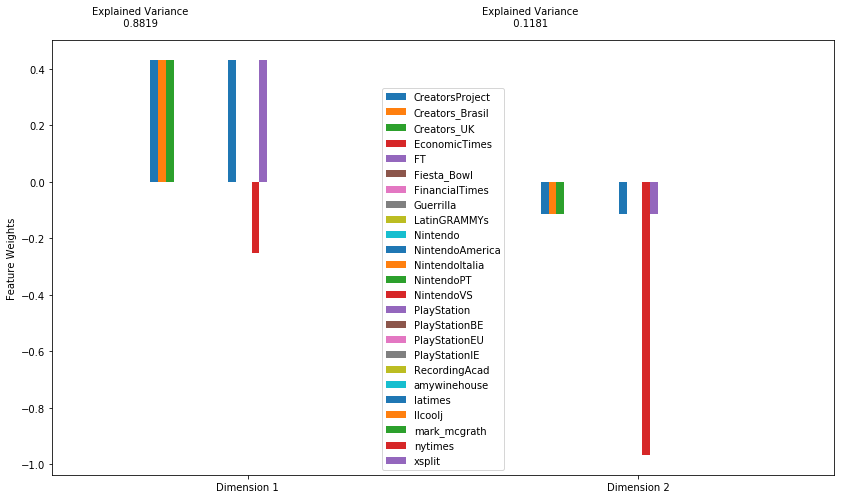

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

reduced_data = pca.transform(df)

print(np.cumsum(pca.explained_variance_ratio_))

pca_results = rs.pca_results(df, pca)
display(pca_results)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
display(reduced_data)

### End